In [3]:
import sklearn
import numpy as np
import sklearn.datasets as skd
import ast
from sklearn.feature_extraction import DictVectorizer
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import confusion_matrix
from scipy.sparse import vstack
import matplotlib.pyplot as plt
import itertools


In [4]:
import pickle

file = open("mr_train.obj",'rb')
mr_train = pickle.load(file)
file.close()

file = open("mr_test.obj",'rb')
mr_test = pickle.load(file)
file.close()

file = open("mr_cv.obj",'rb')
mr_cv = pickle.load(file)
file.close()


'''
file = open("b_train.obj",'rb')
b = pickle.load(file)
file.close()

file = open("c_cv.obj",'rb')
c = pickle.load(file)
file.close()

file = open("d_test.obj",'rb')
d = pickle.load(file)
file.close()
'''


file = open("x_train.obj",'rb')
x_train = pickle.load(file)
file.close()


file = open("x_test.obj",'rb')
x_test = pickle.load(file)
file.close()

file = open("x_cv.obj",'rb')
x_cv = pickle.load(file)
file.close()

In [5]:
print(len(mr_train.data))

5757


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(20,10))
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=10)
    plt.yticks(tick_marks, classes,fontsize=10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:

print("Training data has %d malware samples and %d features" % (x_train.shape[0], x_train.shape[1]))
print("Crossval data has %d malware samples and %d features" % (x_cv.shape[0], x_cv.shape[1]))
print("Test data has %d malware samples and %d features" % (x_test.shape[0], x_test.shape[1]))

print("Performing IG Feature selection...")

indices=np.argsort(np.asarray(x_train.sum(axis=0)).ravel(),axis=0)[::-1][:5000]
x_train_ig = x_train[:,indices]
x_cv_ig = x_cv[:,indices]
x_test_ig = x_test[:,indices]

ker='linear'
c=0.01

print("Training SVM Classifier with %s kernel and %.4f C ..." % (ker,c))
SVM = SVC(C=c,kernel=ker)
SVM.fit(x_train_ig,mr_train.target)

print("Obtaining predictions on test data...")
y_pred_cv=SVM.predict(x_cv_ig)
y_pred_test=SVM.predict(x_test_ig)

prec_cv, rec_cv, fsc_cv, sup_cv = precision_recall_fscore_support(mr_cv.target, y_pred_cv, average='weighted')
prec_test, rec_test, fsc_test, sup_test = precision_recall_fscore_support(mr_test.target, y_pred_test, average='weighted')

print("Precision on crossval data is %.4f" % prec_cv)
print("Recall on crossval data is %.4f" % rec_cv)
print("Precision on test data is %.4f" % prec_test)
print("Recall on test data is %.4f" % rec_test)

Training data has 5757 malware samples and 425200 features
Crossval data has 1237 malware samples and 425200 features
Test data has 2067 malware samples and 425200 features
Performing IG Feature selection...
Training SVM Classifier with linear kernel and 0.0100 C ...
Obtaining predictions on test data...
Precision on crossval data is 0.9645
Recall on crossval data is 0.9644
Precision on test data is 0.0797
Recall on test data is 0.1248


/beegfs/vvb231/py3.6/py3.6.3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
#Distance measure to hyperplanes
print("Computing mean distance of training samples of each class to their hyperplane")


Computing mean distance of training samples of each class to their hyperplane


In [9]:
t=np.array([])
#m=np.array([])
#std=np.array([])
alpha=1

In [1]:
'''
for i in range(len(mr_train.target_names)):
    m= np.append(m,np.mean(SVM.decision_function(x_train_ig)[np.argmax(SVM.decision_function(x_train_ig),axis=1)==i][:,i]))
    print('{} done'.format(mr_train.target_names[i]))
    
'''    

"\nfor i in range(len(mr_train.target_names)):\n    m= np.append(m,np.mean(SVM.decision_function(x_train_ig)[np.argmax(SVM.decision_function(x_train_ig),axis=1)==i][:,i]))\n    print('{} done'.format(mr_train.target_names[i]))\n    \n"

In [10]:
# f1 = open("m_svm_IG.obj","wb")
# pickle.dump(m,f1)
# f1.close()

file = open("m_svm_IG.obj",'rb')
m = pickle.load(file)
file.close()

print(len(m))

25


In [2]:
'''
for i in range(len(mr_train.target_names)):
    
    std = np.append(std,np.std(SVM.decision_function(x_train_ig)[np.argmax(SVM.decision_function(x_train_ig),axis=1)==i][:,i]))
    print('{} done'.format(i))
'''  

"\nfor i in range(len(mr_train.target_names)):\n    \n    std = np.append(std,np.std(SVM.decision_function(x_train_ig)[np.argmax(SVM.decision_function(x_train_ig),axis=1)==i][:,i]))\n    print('{} done'.format(i))\n"

25


In [11]:
# f1 = open("std_svm_IG.obj","wb")
# pickle.dump(std,f1)
# f1.close()

file = open("std_svm_IG.obj",'rb')
std = pickle.load(file)
file.close()


print(len(std))

25


In [15]:
for i in range(len(mr_train.target_names)):
    t=np.append(t,m[i]-alpha*std[i])
    print('{} done'.format(i))

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done


In [16]:
print("Finding and selecting drifted objects in test set based on thresholds")
ind_drift_hyp=np.array([])

Finding and selecting drifted objects in test set based on thresholds


In [17]:
for i in range(len(mr_train.target_names)):    
    ind_drift_hyp = np.append(ind_drift_hyp,np.flatnonzero(np.argmax(SVM.decision_function(x_test_ig),axis=1)==i)[np.flatnonzero([SVM.decision_function(x_test_ig)[np.where(np.argmax(SVM.decision_function(x_test_ig),axis=1)==i),i]<t[i]][0][0]==True)])
    print('{} done'.format(i)) 

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done


In [18]:
#f1 = open("ind_drift_hyp.obj","wb")
#pickle.dump(ind_drift_hyp,f1)
#f1.close()

In [19]:
"""
#Distance measure to hyperplanes
print("Computing mean distance of training samples of each class to their hyperplane")
t=np.array([])
m=np.array([])
std=np.array([])
alpha=1
for i in range(len(mr_train.target_names)):
    m= np.append(m,np.mean(SVM.decision_function(x_train_ig)[np.argmax(SVM.decision_function(x_train_ig),axis=1)==i][:,i]))
    std = np.append(std,np.std(SVM.decision_function(x_train_ig)[np.argmax(SVM.decision_function(x_train_ig),axis=1)==i][:,i]))
    t=np.append(t,m[i]-alpha*std[i])
    print('{} done'.format(mr_train.target_names[i]))
"""




"""
print("Finding and selecting drifted objects in test set based on thresholds")
ind_drift_hyp=np.array([])
for i in range(len(mr_train.target_names)):    
    ind_drift_hyp = np.append(ind_drift_hyp,np.flatnonzero(np.argmax(SVM.decision_function(x_test_ig),axis=1)==i)[np.flatnonzero([SVM.decision_function(x_test_ig)[np.where(np.argmax(SVM.decision_function(x_test_ig),axis=1)==i),i]<t[i]][0][0]==True)])
"""



ind_drift_hyp=ind_drift_hyp.astype(int)

print("Total drifted samples in test set: %d out of %d samples" % (ind_drift_hyp.size,len(mr_test.data)))
print("Percentage of drifted samples in test set: %.4f" % (np.double(ind_drift_hyp.size)/len(mr_test.data)))

print("Relabelling drifted samples, and retraining SVM...")
x_train_drift_hyp_drift = vstack([x_train_ig,x_test_ig[ind_drift_hyp]])
mr_train_drift_hyp_drift = np.append(mr_train.target,mr_test.target[ind_drift_hyp],axis=0)
SVM_drift_hyp = SVC(C=c,kernel=ker)
SVM_drift_hyp.fit(x_train_drift_hyp_drift,mr_train_drift_hyp_drift)

print("Computing predictions on test data with newly trained model...")
y_drift_hyp = SVM_drift_hyp.predict(x_test_ig)

prec_drift_hyp, rec_drift_hyp, fsc_drift_hyp, sup_drift_hyp = precision_recall_fscore_support(mr_test.target,y_drift_hyp, average='weighted')

print("Precision on test data with new classes with original model was %.4f" %prec_test)
print("Recall on test data with new classes with original model was %.4f" %rec_test)
print("Precision on test data with new classes with concept drift-aware model %.4f" %prec_drift_hyp)
print("Recall on test data with new classes with concept drift-aware model %.4f" %rec_drift_hyp)


Total drifted samples in test set: 865 out of 2067 samples
Percentage of drifted samples in test set: 0.4185
Relabelling drifted samples, and retraining SVM...
Computing predictions on test data with newly trained model...
Precision on test data with new classes with original model was 0.0797
Recall on test data with new classes with original model was 0.1248
Precision on test data with new classes with concept drift-aware model 0.7108
Recall on test data with new classes with concept drift-aware model 0.5941


In [20]:
#Distance measure to class centroids

print("Finding class centroids and computing distance of samples to centroids")
clf = NearestCentroid()
clf.fit(x_train_ig,mr_train.target)

dist_train = pairwise_distances(x_train_ig, clf.centroids_)
dist_test = pairwise_distances(x_test_ig, clf.centroids_)

print("Calculating drift_l2 thresholds...")
m = np.resize(np.array([]),8)
var = np.resize(np.array([]),8)
thresh = np.resize(np.array([]),8)
for i in range(8):
    m[i] = np.mean(dist_train[np.where(np.argmin(dist_train,axis=1)==i)][:,i])
    var[i] = np.sqrt(np.std(dist_train[np.where(np.argmin(dist_train,axis=1)==i)][:,i]))
    thresh[i] = m[i]+var[i] 
    

test_drift_l2 = np.resize(np.array([]),8)
test_total = np.resize(np.array([]),8)
test_d_per = np.resize(np.array([]),8)

print("Calculating drift_l2 on test data with new classes...")
for r in range(8):
    test_drift_l2[r]=sum(dist_test[np.where(np.argmin(dist_test,axis=1)==r)][:,r] > thresh[r])
    test_total[r]= sum(np.argmin(dist_test,axis=1)==r)
    if test_total[r]!=0:
        test_d_per[r]=test_drift_l2[r]/test_total[r]
    else:
        test_d_per[r]='nan'
        
print("In test set there are %d drift_l2ed malware of a total of %d samples, total drift_l2 percentage is %.4f" % (sum(test_drift_l2), sum(test_total), sum(test_drift_l2)/sum(test_total)))

print("Selecting drift_l2ed malware samples from test set...")
ind_array_test = np.array([])
indices_test = np.array([])

for i in range(8):
    ind_array_test = np.where(np.argmin(dist_test,axis=1)==i)
    indices_test = np.append(indices_test,ind_array_test[0][dist_test[np.where(np.argmin(dist_test,axis=1)==i)][:,i] > thresh[i]])

print("Appending drift_l2ed malware samples from test set to training set, and re-labelling...")
x_train_drift_l2 = vstack([x_train_ig,x_test_ig[indices_test.astype(int)]])
mr_train_drift_l2_target = np.append(mr_train.target,mr_test.target[indices_test.astype(int)],axis=0)

print("Training drift_l2-Aware SVM classifier with new training set...")
SVM_drift_l2 = SVC(C=c,kernel=ker)
SVM_drift_l2.fit(x_train_drift_l2,mr_train_drift_l2_target)

print("Computing predictions on test data with newly trained model...")
y_drift_l2 = SVM_drift_l2.predict(x_test_ig)

prec_drift_l2, rec_drift_l2, fsc_drift_l2, sup_drift_l2 = precision_recall_fscore_support(mr_test.target,y_drift_l2, average='weighted')

print("Precision on test data with new classes with original model was %.4f" %prec_test)
print("Recall on test data with new classes with original model was %.4f" %rec_test)
print("Precision on test data with new classes with concept drift_l2-aware model %.4f" %prec_drift_l2)
print("Recall on test data with new classes with concept drift_l2-aware model %.4f" %rec_drift_l2)



Finding class centroids and computing distance of samples to centroids
Calculating drift_l2 thresholds...
Calculating drift_l2 on test data with new classes...
In test set there are 484 drift_l2ed malware of a total of 868 samples, total drift_l2 percentage is 0.5576
Selecting drift_l2ed malware samples from test set...
Appending drift_l2ed malware samples from test set to training set, and re-labelling...
Training drift_l2-Aware SVM classifier with new training set...
Computing predictions on test data with newly trained model...
Precision on test data with new classes with original model was 0.0797
Recall on test data with new classes with original model was 0.1248
Precision on test data with new classes with concept drift_l2-aware model 0.6420
Recall on test data with new classes with concept drift_l2-aware model 0.4228


In [21]:
# Computing intersections of flagged samples and actual new class samples for hyperplane drift
intersection = np.intersect1d(np.sort(ind_drift_hyp),np.flatnonzero(mr_test.target > 7))
print(intersection.shape)
print("Precision with alpha = %d is %.4f, recall is %.4f, flagged samples are %d, percentage of samples flagged is %.4f and percentage of flagged samples that actually belong to new families is %.4f" % (alpha,prec_drift_hyp,rec_drift_hyp,len(ind_drift_hyp),np.double(len(ind_drift_hyp))/np.double(len(mr_test.data)),np.double(intersection.shape[0])/np.double(np.flatnonzero(mr_test.target > 7).size)))



(640,)
Precision with alpha = 1 is 0.7108, recall is 0.5941, flagged samples are 865, percentage of samples flagged is 0.4185 and percentage of flagged samples that actually belong to new families is 0.4134


Computing confusion matrices...
Plotting confusion matrix for crossvalidation data
Confusion matrix, without normalization
[[ 28   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0 149   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   1  26   0   0   1   2   0   0   2   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   0  50   0   1   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   1]
 [  0   0   0   0  18   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  40   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   1 147   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   1]
 [  0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   1   0  11

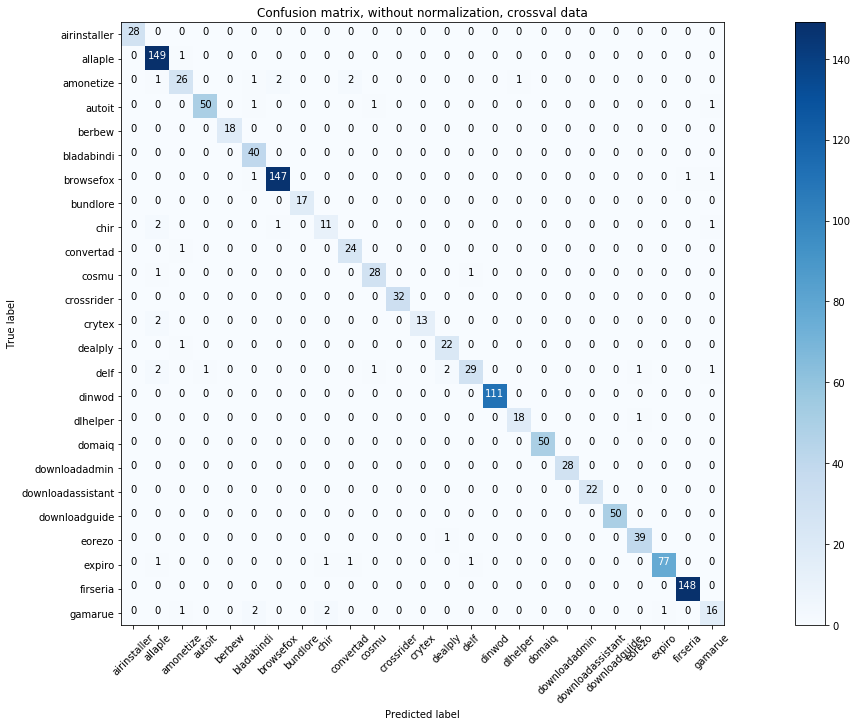

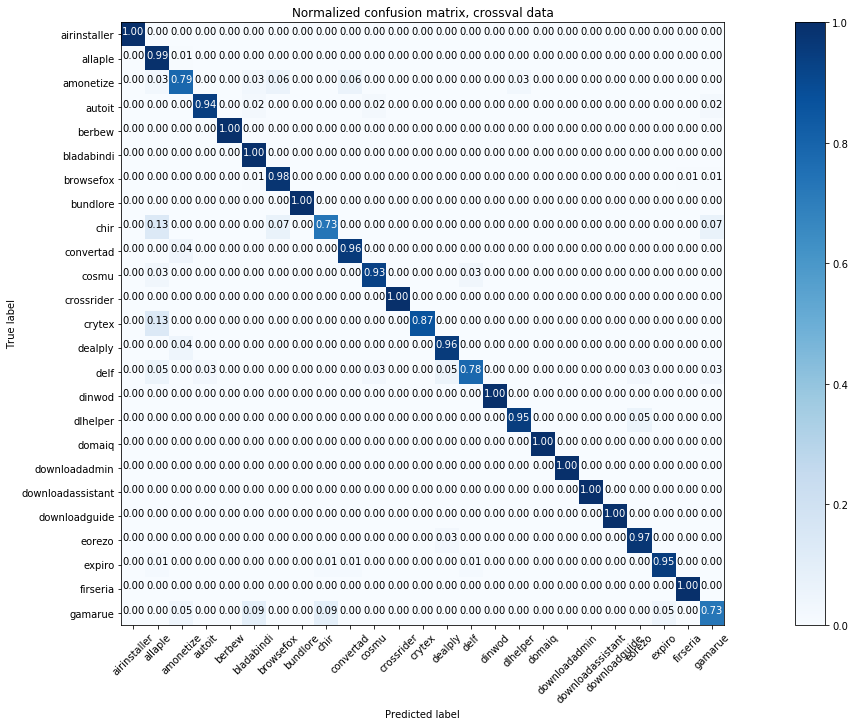

Plotting confusion matrix for test data in base model
Confusion matrix, without normalization
[[ 27   1   0 ...,   0   0   0]
 [  0 150   0 ...,   0   0   0]
 [  0   1  29 ...,   0   0   0]
 ..., 
 [  0   0   1 ...,   0   0   0]
 [  0   2   0 ...,   0   0   0]
 [  0   0   1 ...,   0   0   0]]
Normalized confusion matrix
[[ 0.96  0.04  0.   ...,  0.    0.    0.  ]
 [ 0.    1.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.03  0.91 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.04 ...,  0.    0.    0.  ]
 [ 0.    0.01  0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.02 ...,  0.    0.    0.  ]]


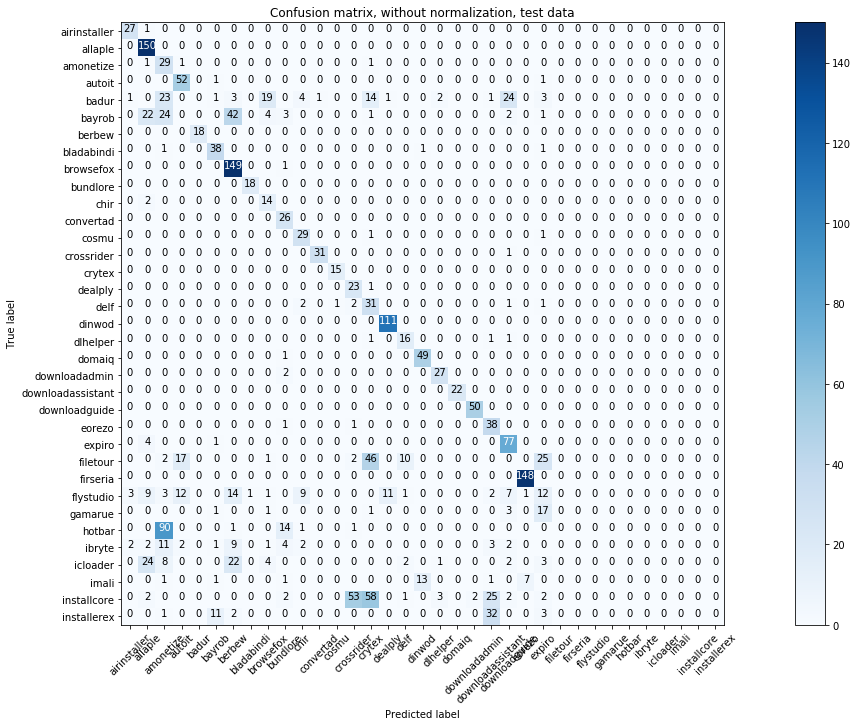

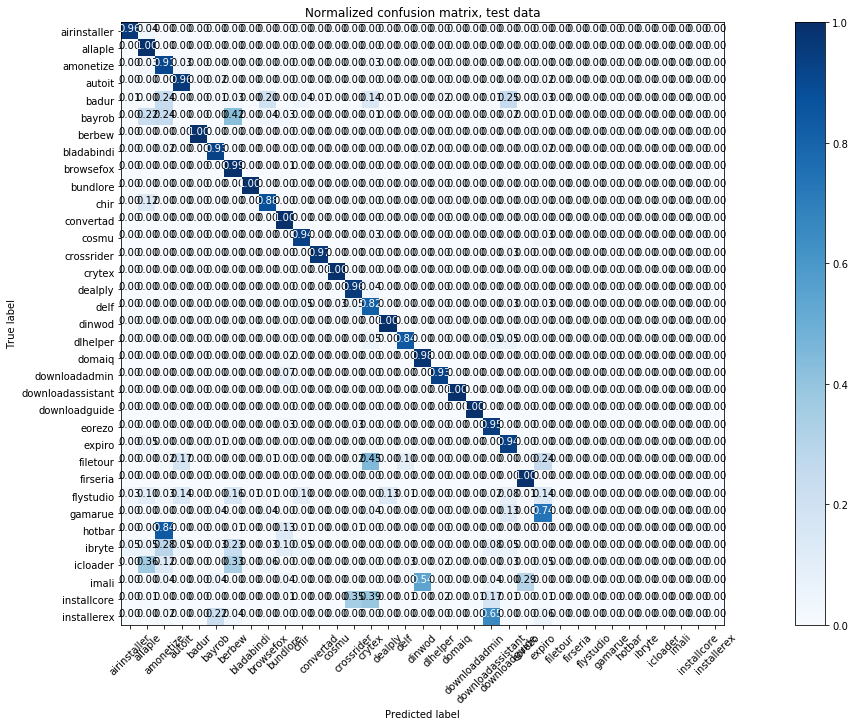

Plotting confusion matrix for test data in drift-aware hyperplane model
Confusion matrix, without normalization
[[ 26   1   0 ...,   0   0   0]
 [  0 150   0 ...,   0   0   0]
 [  0   1  31 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  22   0   0]
 [  0   0   0 ...,   0 149   0]
 [  0   0   0 ...,   0   0  49]]
Normalized confusion matrix
[[ 0.93  0.04  0.   ...,  0.    0.    0.  ]
 [ 0.    1.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.03  0.97 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.92  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.99  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    1.  ]]


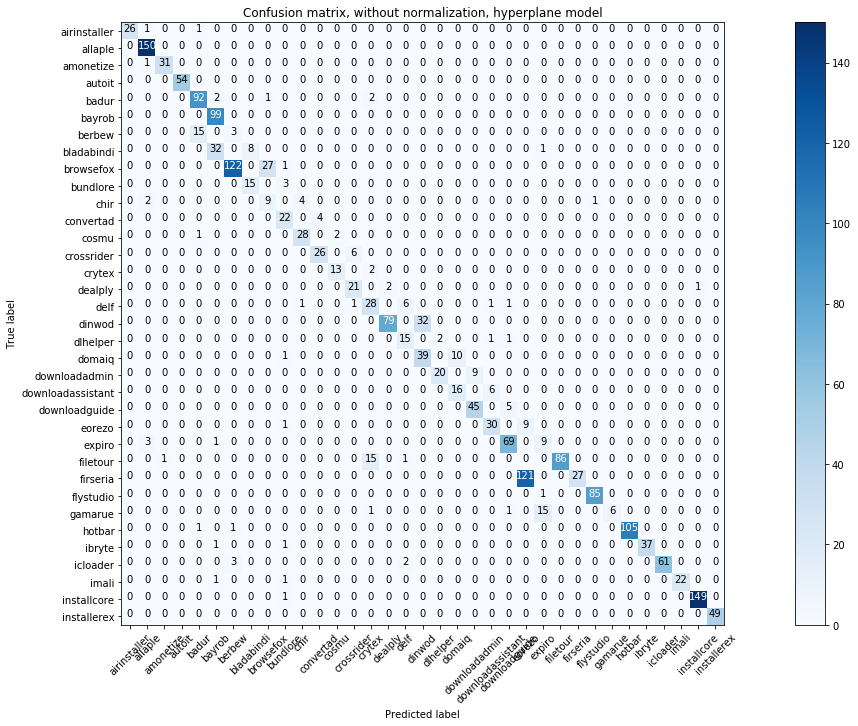

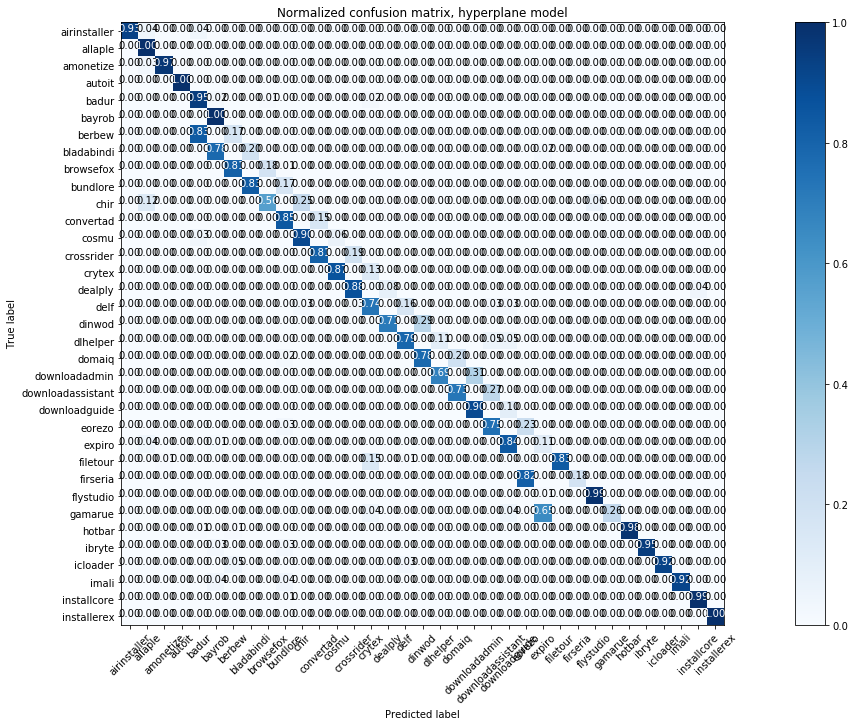

Plotting confusion matrix for test data in drift-aware l2 model
Confusion matrix, without normalization
[[ 27   1   0 ...,   0   0   0]
 [  0 150   0 ...,   0   0   0]
 [  0   1  30 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   2   0   0]
 [  0   0   0 ...,   0  23   0]
 [  0   0   0 ...,   0   0  47]]
Normalized confusion matrix
[[ 0.96  0.04  0.   ...,  0.    0.    0.  ]
 [ 0.    1.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.03  0.94 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.08  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.15  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.96]]


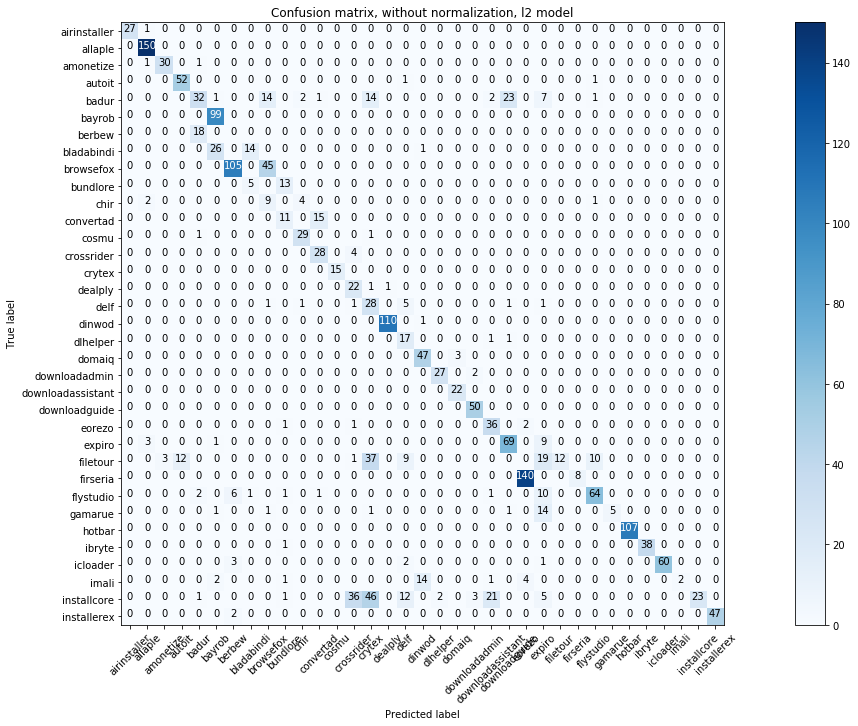

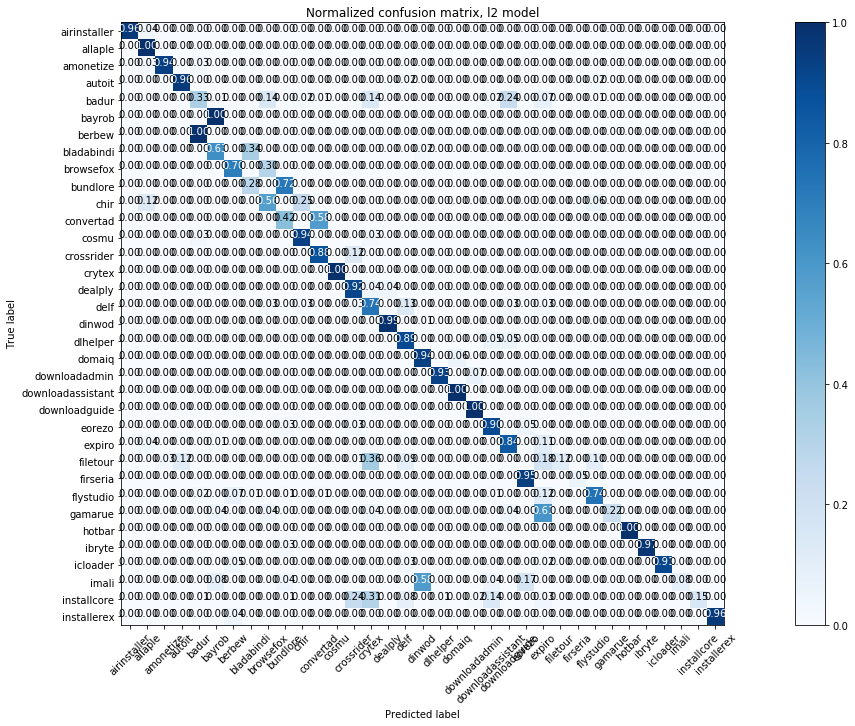

In [22]:
#Confusion Matrices



print("Computing confusion matrices...")
cnf_matrix_cv = confusion_matrix(mr_cv.target, y_pred_cv)
cnf_matrix_test = confusion_matrix(mr_test.target,y_pred_test)
cnf_matrix_drift_hyp = confusion_matrix(mr_test.target,y_drift_hyp)
cnf_matrix_drift_l2 = confusion_matrix(mr_test.target,y_drift_l2)


print("Plotting confusion matrix for crossvalidation data")
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_cv, classes=mr_cv.target_names,
                      title='Confusion matrix, without normalization, crossval data')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_cv, classes=mr_cv.target_names, normalize=True,
                      title='Normalized confusion matrix, crossval data')

plt.show()

print("Plotting confusion matrix for test data in base model")
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=mr_test.target_names,
                      title='Confusion matrix, without normalization, test data')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=mr_test.target_names, normalize=True,
                      title='Normalized confusion matrix, test data')

plt.show()

print("Plotting confusion matrix for test data in drift-aware hyperplane model")
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_drift_hyp, classes=mr_test.target_names,
                      title='Confusion matrix, without normalization, hyperplane model')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_drift_hyp, classes=mr_test.target_names, normalize=True,
                      title='Normalized confusion matrix, hyperplane model')

plt.show()

print("Plotting confusion matrix for test data in drift-aware l2 model")
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_drift_l2, classes=mr_test.target_names,
                      title='Confusion matrix, without normalization, l2 model')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_drift_l2, classes=mr_test.target_names, normalize=True,
                      title='Normalized confusion matrix, l2 model')

plt.show()